In [2]:
!pip install tensorflow 

# **import dependencies**

In [3]:
!pip install numpy matplotlib

In [4]:
!pip install opencv-python

In [2]:
### import dependencies

import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## import tensorflow dependencies - functional api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf




## **setting gpu growth**

In [ ]:
 ### gpu growth

 # avoid OOM errors by setting GPU memory consumption growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  
  tf.config.experimental.set_memory_growth(gpu,True)

## **folder structure for data**

In [4]:
### setup folder structure

#setup paths
pos_path = os.path.join('data','positive')
neg_path = os.path.join('data','negative')
anc_path = os.path.join('data','anchor')
 

In [11]:
##make dirs
os.makedirs(pos_path)
os.makedirs(neg_path)
os.makedirs(anc_path)

In [12]:
### untar labelled faces in the wild datasets
# http://vis-www.cs.umass.edu/lfw/

!tar -xf lfw.tgz

## **putting images together**

In [13]:
## moving lfw images to the data/negative

for directory in os.listdir('lfw'):
  for file in os.listdir(os.path.join('lfw',directory)):
    ex_path = os.path.join('lfw',directory,file)
    new_path = os.path.join('data/negative',file)
    os.replace(ex_path,new_path)

In [14]:
for file in os.listdir('data/negative'):
  print(file)

Aaron_Eckhart_0001.jpg
Aaron_Guiel_0001.jpg
Aaron_Patterson_0001.jpg
Aaron_Peirsol_0001.jpg
Aaron_Peirsol_0002.jpg
Aaron_Peirsol_0003.jpg
Aaron_Peirsol_0004.jpg
Aaron_Pena_0001.jpg
Aaron_Sorkin_0001.jpg
Aaron_Sorkin_0002.jpg
Aaron_Tippin_0001.jpg
Abbas_Kiarostami_0001.jpg
Abba_Eban_0001.jpg
Abdel_Aziz_Al-Hakim_0001.jpg
Abdel_Madi_Shabneh_0001.jpg
Abdel_Nasser_Assidi_0001.jpg
Abdel_Nasser_Assidi_0002.jpg
Abdoulaye_Wade_0001.jpg
Abdoulaye_Wade_0002.jpg
Abdoulaye_Wade_0003.jpg
Abdoulaye_Wade_0004.jpg
Abdulaziz_Kamilov_0001.jpg
Abdullah_0001.jpg
Abdullah_0002.jpg
Abdullah_0003.jpg
Abdullah_0004.jpg
Abdullah_Ahmad_Badawi_0001.jpg
Abdullah_al-Attiyah_0001.jpg
Abdullah_al-Attiyah_0002.jpg
Abdullah_al-Attiyah_0003.jpg
Abdullah_Gul_0001.jpg
Abdullah_Gul_0002.jpg
Abdullah_Gul_0003.jpg
Abdullah_Gul_0004.jpg
Abdullah_Gul_0005.jpg
Abdullah_Gul_0006.jpg
Abdullah_Gul_0007.jpg
Abdullah_Gul_0008.jpg
Abdullah_Gul_0009.jpg
Abdullah_Gul_0010.jpg
Abdullah_Gul_0011.jpg
Abdullah_Gul_0012.jpg
Abdullah_Gul_001

In [5]:
### import uuid library to generate unique image names
import uuid

## **Collect positive and anchor images**


In [41]:
# establish the connection to webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
else:
    print("Webcam opened successfully.")

while cap.isOpened():
  ret,frame = cap.read()
  frame = frame[50:300,250:500,:]
  
  ## collect anchors
  if cv2.waitKey(1) & 0XFF == ord('a'):
    #create unique name
    imgname= os.path.join(anc_path, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname,frame) 
      
  
  ##collect positives
  if cv2.waitKey(1) & 0XFF == ord('p'):
    #create unique name
    imgname= os.path.join(pos_path, '{}.jpg'.format(uuid.uuid1()))
    cv2.imwrite(imgname,frame)
    
    
  # show image back to screen
  cv2.imshow("Image Collection", frame)

  #breaking gracefully
  if cv2.waitKey(1) & 0XFF == ord('q'):
    break

# release teh webcam
cap.release()

#close the image fram
cv2.destroyAllWindows()

Webcam opened successfully.


In [38]:
frame.shape

(250, 250, 3)

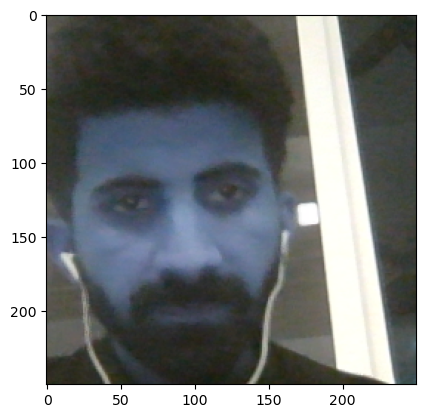

In [39]:
plt.imshow(frame) 

# **Load and preprocess Images**

### **Get image directotries**

In [6]:
anchor = tf.data.Dataset.list_files(anc_path+'\*.jpg').take(200)
positive = tf.data.Dataset.list_files(pos_path+'\*.jpg').take(200)
negative = tf.data.Dataset.list_files(neg_path+'\*.jpg').take(200)


In [7]:
dir_test = anchor.as_numpy_iterator()

In [8]:
dir_test.next()

b'data\\anchor\\8086390b-2366-11ef-ae66-40b0344c035c.jpg'

## **Preprocessing - scaling and resizing**

In [9]:
def preprocess(file_path):
  
  ## rea in image from file path
  byte_img = tf.io.read_file(file_path)
  
  ## decode the byte image data
  img = tf.io.decode_jpeg(byte_img)
  #preprocess
  img = tf.image.resize(img, (100,100))
  #scaling the image etween 0 and 1 for better model performance
  img = img/255.0
  return img

In [10]:
img = preprocess('data\\anchor\\83357c9c-2366-11ef-ab57-40b0344c035c.jpg')

In [11]:
img.numpy().min()

0.04117647

In [15]:
print(img)

tf.Tensor(
[[[0.40392157 0.42181373 0.43357843]
  [0.39044118 0.42328432 0.43039215]
  [0.3732843  0.41838235 0.41936275]
  ...
  [0.18137255 0.22058824 0.18480392]
  [0.19436274 0.2254902  0.19044118]
  [0.18529412 0.21372549 0.17941177]]

 [[0.39338234 0.43259802 0.4365196 ]
  [0.38627452 0.42745098 0.43039215]
  [0.37083334 0.41495097 0.41495097]
  ...
  [0.19460784 0.21715686 0.1995098 ]
  [0.19975491 0.21789216 0.20245098]
  [0.20490196 0.22156863 0.20882353]]

 [[0.36960784 0.41666666 0.41666666]
  [0.36519608 0.4107843  0.41004902]
  [0.36519608 0.40490195 0.40122548]
  ...
  [0.21397059 0.2365196  0.2002451 ]
  [0.20465687 0.22205882 0.19632353]
  [0.21666667 0.22745098 0.20392157]]

 ...

 [[0.13014705 0.17230392 0.18014705]
  [0.12132353 0.16078432 0.17279412]
  [0.11617647 0.15563725 0.16617647]
  ...
  [0.08504902 0.14779411 0.14485294]
  [0.09117647 0.15465686 0.15392157]
  [0.075      0.12696078 0.13186274]]

 [[0.12034313 0.16544117 0.16740195]
  [0.11397059 0.15931372 0

## **Creating Labelled Dataset**

In [12]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0



In [13]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))

negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))

data = positives.concatenate(negatives)


In [14]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [15]:
classreps = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [16]:

iter = classreps.as_numpy_iterator()

In [17]:
iter.next()

0.0

In [18]:
d = data.as_numpy_iterator()

In [19]:
example =d.next()

## **Build train and test partition**

In [20]:
def preprocess_twin(input_img, validation_img, label):
  return (preprocess(input_img), preprocess(validation_img), label)

In [21]:
preprocess_twin(*example)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.33995098, 0.38504902, 0.38602942],
         [0.34240195, 0.3879902 , 0.38088235],
         [0.31985295, 0.3779412 , 0.36053923],
         ...,
         [0.16642156, 0.2112745 , 0.20441176],
         [0.1747549 , 0.21593137, 0.20318627],
         [0.13455883, 0.17941177, 0.1637255 ]],
 
        [[0.3262255 , 0.38897058, 0.38504902],
         [0.32230392, 0.38333333, 0.3781863 ],
         [0.3122549 , 0.3740196 , 0.3622549 ],
         ...,
         [0.16985294, 0.21495098, 0.21397059],
         [0.1747549 , 0.21078432, 0.20049019],
         [0.17720588, 0.21862745, 0.19534314]],
 
        [[0.33014706, 0.37916666, 0.37916666],
         [0.3482843 , 0.3887255 , 0.3897059 ],
         [0.3409314 , 0.37107843, 0.36911765],
         ...,
         [0.17181373, 0.21151961, 0.18382353],
         [0.18112744, 0.21053922, 0.18504901],
         [0.18357843, 0.21985294, 0.19730392]],
 
        ...,
 
        [[0.09142157, 0.13553922

In [22]:
### dataloader pipeline

data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [23]:
d = data.as_numpy_iterator()


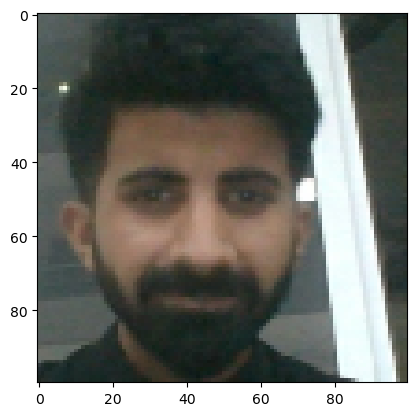

In [24]:
plt.imshow(d.next()[1])

In [25]:
d.next()[2]

1.0

In [26]:
### training partition

train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [27]:
### Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [28]:
t = test_data.as_numpy_iterator()

In [29]:
tt = t.next()

In [30]:
len(tt[0])

16

# **Model Engineering**

## **Build Embedding Layer**

In [31]:
def make_embedding():
  inp = Input(shape=(100,100,3))
  #convolutional layer
  c1 = Conv2D(64,(10,10), activation='relu')(inp)
  #max pooling layer
  m1 = MaxPooling2D(64,(2,2), padding='same')(c1)
  # Second Block
  c2 = Conv2D(128,(7,7), activation='relu')(m1)
  m2 = MaxPooling2D(64,(2,2), padding='same')(c2)
  
  #Block 3
  c3 = Conv2D(128,(4,4), activation='relu')(m2)
  m3 = MaxPooling2D(64,(2,2), padding='same')(c3)
  
  # Final Block
  c4 = Conv2D(256,(4,4), activation='relu')(m3)
  f1 = Flatten()(c4)
  d1 = Dense(4096, activation='sigmoid')(f1)
  
  
  return Model(inputs= [inp], outputs= [d1], name ='embedding')

In [41]:
embedding = make_embedding()

In [42]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

## **BUild Distance Layer**

In [55]:
# Siamese L1 distance class

class L1Dist(Layer):
  
  # init method for inheritance
  def __init__(self, **kwargs):
    super().__init__()
    
  
  # similarity calculation
  def call(self, input_embedding, validation_embedding):
    return tf.math.abs(input_embedding[0] - validation_embedding[0])

In [56]:
l1 = L1Dist() 

In [57]:
l1

<L1Dist name=l1_dist_4, built=False>

## **Make Siamese Network**

In [58]:
def make_siamese_model():
  # handle inputs
  #anchor image
  input_img = Input(name='input_img', shape=(100,100,3))
  #valudation image
  validation_image = Input(name='validation_img', shape=(100,100,3))
  
  ## Combine siamese network  components
  
  siamese_layer = L1Dist()
  siamese_layer._name = 'distance'
  distances = siamese_layer(embedding(input_img),embedding(validation_image))
  
  ## Classification
  
  classifier = Dense(1, activation='sigmoid')(distances)
  
  return Model(inputs=[input_img, validation_image], outputs=classifier, name = 'SiameseNetwork')
  
  
  


# **Training**


In [59]:
siamese_model = make_siamese_model()

## **Setup loss and optimizer**

In [60]:
#loss
binary_cross_loss = tf.losses.BinaryCrossentropy()
#optimizer
opt= tf.keras.optimizers.Adam(1e-4) #0.0001


## **Establish checkpoints**

In [61]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir,'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model= siamese_model)

## **Build train step function**

In [62]:
@tf.function
def train_step(batch):
  with tf.GradientTape() as tape:
    #get anchor and positive/negative image
    X = batch[:2]
    # get label
    y = batch[2]
    
    # foward pass
    yhat = siamese_model(X,training=True)
    #calculate loss
    loss = binary_cross_loss(y,yhat)
  print('loss= ',loss)
    
  # calculate gradients
  grad = tape.gradient(loss,siamese_model.trainable_variables)
  
  # calculate updated weights and apply to siamese model
  opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
  return loss
    
    
  

## **Build Training Loop**

In [64]:
def train(data, EPOCHS):
  # loop through epochs
  for epoch in range(1, EPOCHS+1):
    print('\n Epoch {}/{}'.format(epoch, EPOCHS))
    progbar = tf.keras.utils.Progbar(len(data))
  
    #loop through each batch
    for idx, batch in enumerate(data):
      
  
      #run train step here
      train_step(batch)
      progbar.update(idx+1)
      
    # save checkpoints
    if epoch %10==0:
      checkpoint.save(file_prefix=checkpoint_prefix)

## **Train Model**

In [66]:
EPOCHS = 50
train(train_data,EPOCHS)


 Epoch 1/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 14s 15s/steploss=  Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
18/18 ━━━━━━━━━━━━━━━━━━━━ 266s 15s/step

 Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 225s 12s/step

 Epoch 3/50
11/18 ━━━━━━━━━━━━━━━━━━━━ 1:42 15s/step

KeyboardInterrupt: 